In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


Let's get started with Titanic Problem

# IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# IMPORTING THE 'TRAIN' AND 'TEST' DATASETS

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y_train = train.iloc[:, 1].values

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis 

We will explore the given data with various given features in datasets before jumping to modeling the data. Here, our main ojective is to gain as much knowledge as we can. We will have maximum insights of data with library Seaborn.

Analysing data with graphs.

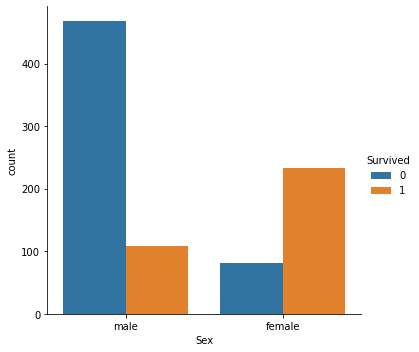

In [7]:
# Countplot 
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train) 

After observing the above graph, we can say that women were more likely to survived than men as they have high rate of survival than man. Hence, in determining whether a passenger will survive or not, gender(male or female) plays an important role.

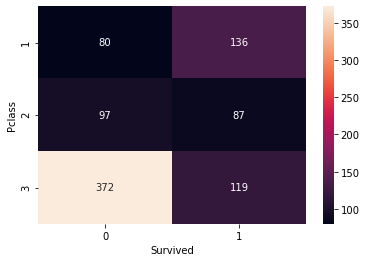

In [8]:
group = train.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack() 
  
sns.heatmap(pclass_survived, annot = True, fmt ="d") 

It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


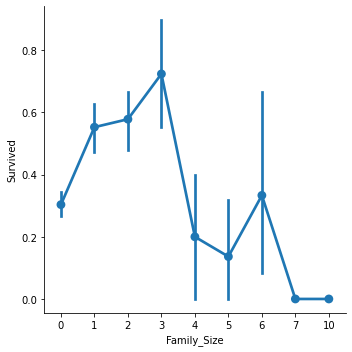

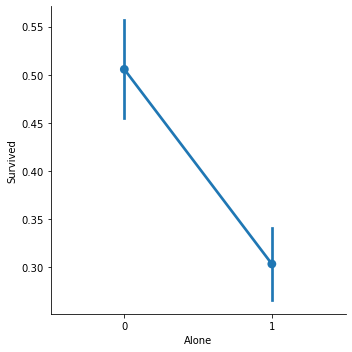

In [9]:
#Code : Factor plot for Family_Size (Count Feature) and Family Size.

# Adding a column Family_Size 
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp'] 
  
# Adding a column Alone 
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1
  
# Factorplot for Family_Size 
sns.factorplot(x ='Family_Size', y ='Survived', data = train) 
  
# Factorplot for Alone 
sns.factorplot(x ='Alone', y ='Survived', data = train) 

Family_Size denotes the number of people in a passenger’s family. It is calculated by summing the SibSp and Parch columns of a respective passenger. Also, another column Alone is added to check the chances of survival of alone passenger against the one with a family.

Important observations –

If a passenger is alone, the survival rate is less.
If the family size is greater than 5, chances of survival decreases considerably.

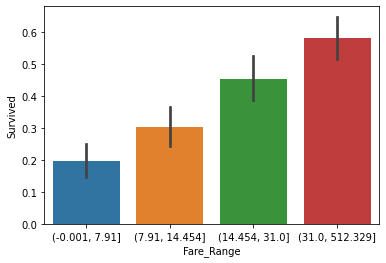

In [10]:
#Code : Bar Plot for Fare


# Divide Fare into 4 bins 
train['Fare_Range'] = pd.qcut(train['Fare'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='Fare_Range', y ='Survived', data = train)

Fare denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for Age feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

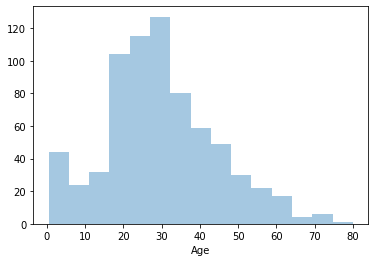

In [11]:
sns.distplot(train['Age'].dropna(), bins=15, kde=False)

Many passensgers are of age 15-40 yrs.

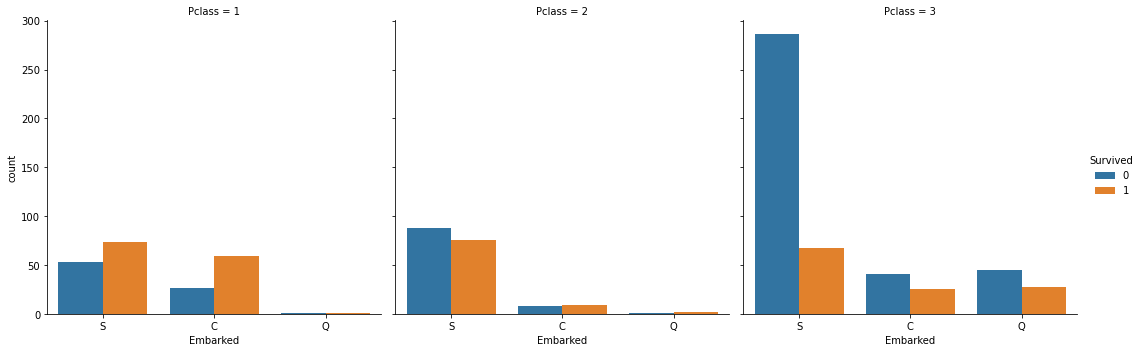

In [12]:
#Code : Categorical Count Plots for Embarked Feature


# Countplot 
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train)

**Some notable observations are:**

* Majority of the passengers boarded from S. 

* Majority of class 3 passengers boarded from Q.

# Overall Conclusions from EDA:


1. Women survived more than men.
2. Class 1 passengers were more lucky than Class 2 and 3.
3. Unfortunately, Class 3 was most affected.
4. Alone passengers had less survival rate.
5. Survival rate is more for passengers who paid higher fare.
6. Most of the passangers were of age between 20-40.
7. Majority of the passengers were boarded from 'S'.

We are done with EDA. Now, we will perform Data Preprocessing on both train and test dataset followed by Feature Scaling and then finally we will train our datasets on various models.

**Excited......????
      
  So let's get one step closer to solve this problem...

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.91, 14.454]"


First we will drop unnecessary columns because they do not contribute to final output.

In [14]:
extra_eda_cols = ['SibSp', 'Parch', 'Family_Size', 'Fare_Range', 'Alone']
train = train.drop(extra_eda_cols, axis = 1, inplace = False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


In [15]:
#droping the  unnecessary columns

extra_cols = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
train = train.drop(extra_cols, axis = 1, inplace = False)
train.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [16]:
x_train = train.drop('Survived', axis = 1, inplace = False)
print(x_train)

     Pclass     Sex   Age Embarked
0         3    male  22.0        S
1         1  female  38.0        C
2         3  female  26.0        S
3         1  female  35.0        S
4         3    male  35.0        S
..      ...     ...   ...      ...
886       2    male  27.0        S
887       1  female  19.0        S
888       3  female   NaN        S
889       1    male  26.0        C
890       3    male  32.0        Q

[891 rows x 4 columns]


## Checking the missing values

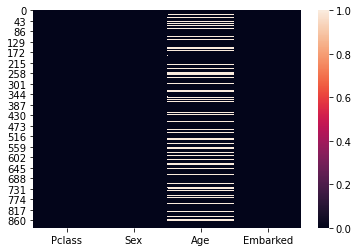

In [17]:
sns.heatmap(x_train.isnull())

In [18]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

Checking how many missing values are there.

'Age' has 177 and 'Embarked' has 2 missing values.

### Filling the missing values column by column using scikit-learn.

In [19]:
#For 'Age' column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[['Age']])
x_train[['Age']]= imputer.transform(x_train[['Age']])


#For 'Embarked' column

imputers = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputers.fit(x_train[['Embarked']])
x_train[['Embarked']]= imputers.transform(x_train[['Embarked']])

In [20]:
x_train.isnull().sum().any()

False

As we see, now there is not any missing value in any column.

In [21]:
x_train.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


# Encoding Categorical Data 

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 


#Sex Column  
x_train['Sex']= label_encoder.fit_transform(x_train['Sex']) 

#Embarked Column
x_train['Embarked']= label_encoder.fit_transform(x_train['Embarked'])

In [23]:
x_train.head()

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2


# Applying Feature Scaling on training data

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

# Preprocessing on TEST Dataset

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Checking for missing values

In [26]:
test.isnull().sum().any()

True

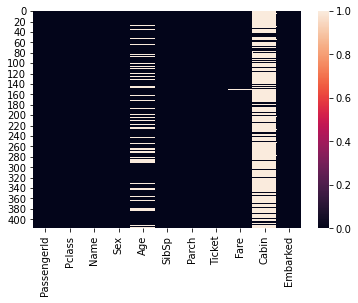

In [27]:
sns.heatmap(test.isnull())

'Cabin' has maximum number of missing values. 'Age' column also have many NaN values and 'Fare' cloumn has 1 missing value.

## Filling missing values column by column

In [28]:
#For 'Age' column

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(test[['Age']])
test[['Age']]= imputer.transform(test[['Age']])


#For 'Embarked' column

imputers = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputers.fit(test[['Embarked']])
test[['Embarked']]= imputers.transform(test[['Embarked']])

# Dropping unnecessary columns

In [29]:
extra_cols_test = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']
test = test.drop(extra_cols_test, axis = 1, inplace = False)
test.head()

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S


# Encoding Categorical Data

In [30]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 


#Sex Column  
test['Sex']= label_encoder.fit_transform(test['Sex']) 

#Embarked Column
test['Embarked']= label_encoder.fit_transform(test['Embarked'])

In [31]:
test.head()

,Pclass,Sex,Age,Embarked
0,3,1,34.5,1
1,3,0,47.0,2
2,2,1,62.0,1
3,3,1,27.0,2
4,3,0,22.0,2


# Applying Feature Scaling on Test Set

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
test = sc_x.fit_transform(test)

# Building Various Classification Models

We will build a number of Classification models and at the end we will take the model having highest accuracy.
So let's get started........

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.7890262172284644

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

In [36]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.8047315855181024

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

In [38]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.7935955056179775

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [40]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.8037078651685393

## SVC

In [41]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(test)

In [42]:
y_pred = classifier.predict(test)
from sklearn.model_selection import cross_val_score
acc_Tree = cross_val_score(classifier, x_train, y_train, cv=10, scoring='accuracy').mean()
acc_Tree

0.8226591760299625

Now we are done with all the models. Now let's make a dataframe showing models with their cross_val_score for visualizing in a good way.

In [43]:
accuracy = {'Model' : ['Logistic Regression', 'K- Nearest Neighbor', 'SVC', 'Decision Tree', 'Random Forest'],
                  'Accuracy' : [0.7890, 0.8047, 0.8226, 0.7935, 0.8037]
                 }
all_cross_val_scores = pd.DataFrame(accuracy, columns = ['Model', 'Accuracy'])
all_cross_val_scores.head()

,Model,Accuracy
0,Logistic Regression,0.7890
1,K- Nearest Neighbor,0.8047
2,SVC,0.8226
3,Decision Tree,0.7935
4,Random Forest,0.8037


Alright as we can see, '**SVC**' has highest score. So, here we have best model.

In [44]:
test_df = pd.read_csv('../input/titanic/test.csv')
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})
submission.to_csv('titanic_prediction.csv', index=False)
print('File Saved')

File Saved


In [45]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
